# Case Study on Measures of Central Tendency and Dispersion

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r'F:\LEKSHMY PK\data science\StudentsPerformance.csv')

In [3]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33
...,...,...,...,...,...,...,...,...
995,male,group E,some college,standard,completed,99,87,81
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
998,male,group E,associate's degree,free/reduced,completed,100,100,93


# 1. Find out how many males and females participated in the test.

In [143]:
df['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

Text(0.5, 1.0, 'Number of male and female students')

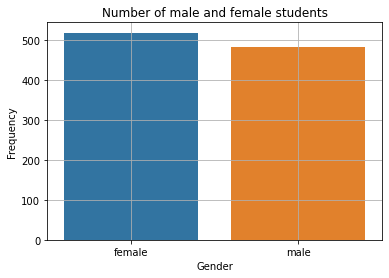

In [4]:
sns.countplot(x=df['gender'],data=df)
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.grid()
plt.title('Number of male and female students')

# 2. What do you think about the students' parental level of education?

In [11]:
df['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

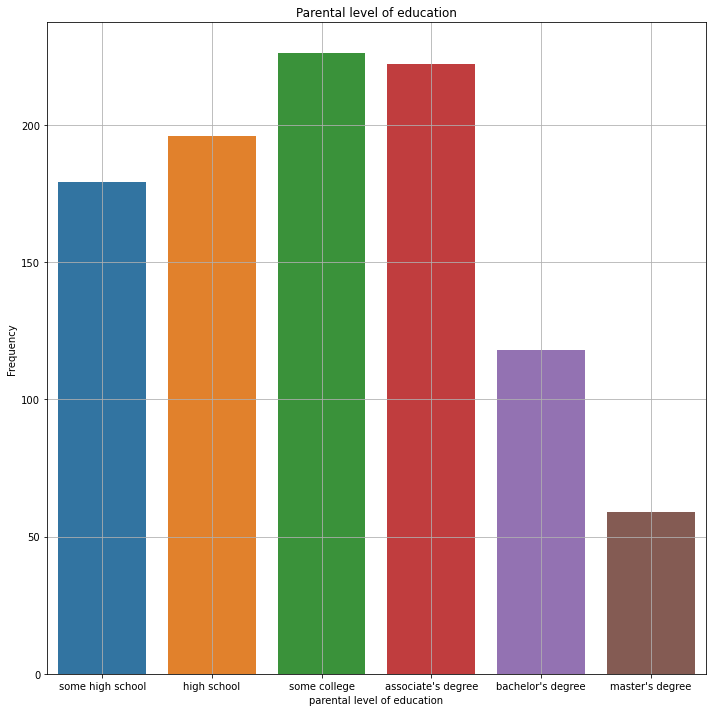

In [20]:
plt.figure(figsize=(10,10))
sns.countplot(x=df['parental level of education'],data=df)
plt.xlabel('parental level of education')
plt.ylabel('Frequency')
plt.grid()
plt.title('Parental level of education')
plt.tight_layout()

In [63]:
#Most of the parents have 'some college degree'

# 3. Who scores the most on average for math, reading and writing based on          ● Gender ● Test preparation course

In [21]:
df[['gender','math score','writing score','reading score']].groupby(['gender']).agg('mean')

,math score,writing score,reading score
gender,,,
female,63.376448,72.467181,72.590734
male,68.821577,63.446058,65.545643


In [64]:
#Average Math score is highest for male students.
#Average writing score,reading score highest for female students

In [31]:
df[['test preparation course','math score','writing score','reading score']].groupby(['test preparation course']).agg('mean')

,math score,writing score,reading score
test preparation course,,,
completed,69.96648,74.684358,74.175978
none,63.78972,64.457944,66.417445


In [ ]:
#Average score is highest among students who took test prepation course in both genders.

# 4. What do you think about the scoring variation for math, reading and writing based on ● Gender                                                                                                                        ● Test preparation course

In [52]:
df[['gender','math score','writing score','reading score']].groupby(['gender']).agg(np.var)

,math score,writing score,reading score
gender,,,
female,256.958593,220.369327,207.677438
male,211.889097,202.413924,200.211010


In [69]:
#Variance in math score, reading score,writing score are higher among among female students.

<AxesSubplot:xlabel='gender', ylabel='writing score'>

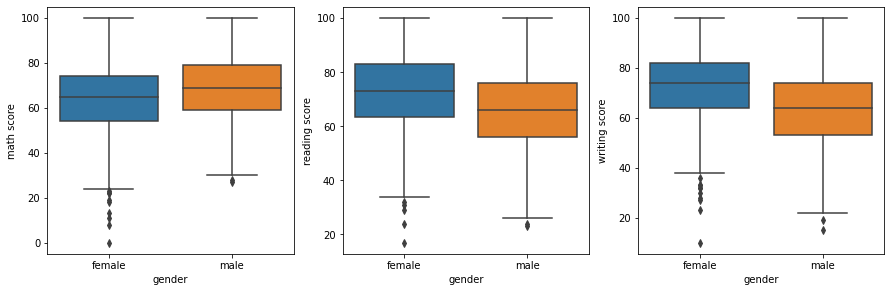

In [65]:
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
sns.boxplot(x='gender',y='math score',data=df)
plt.subplot(2,3,2)
sns.boxplot(x='gender',y='reading score',data=df)
plt.subplot(2,3,3)
sns.boxplot(x='gender',y='writing score',data=df)

In [50]:
df[['test preparation course','math score','writing score','reading score']].groupby(['test preparation course']).agg(np.var)

,math score,writing score,reading score
test preparation course,,,
completed,210.884027,175.202612,183.265864
none,246.668662,226.251739,213.419851


In [68]:
#Variance in math score,reading score,writing score is higher among students with no preparation courses.

<AxesSubplot:xlabel='test preparation course', ylabel='writing score'>

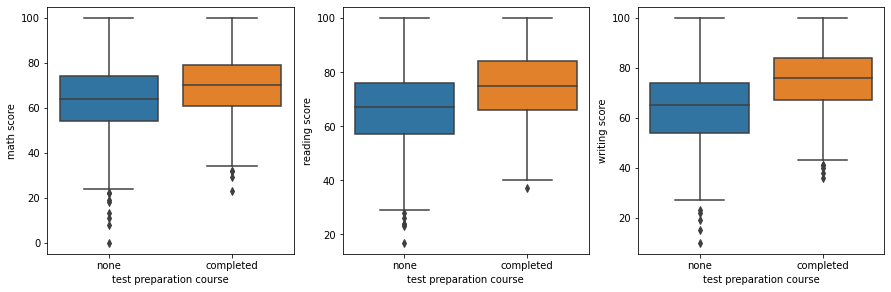

In [66]:
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
sns.boxplot(x='test preparation course',y='math score',data=df)
plt.subplot(2,3,2)
sns.boxplot(x='test preparation course',y='reading score',data=df)
plt.subplot(2,3,3)
sns.boxplot(x='test preparation course',y='writing score',data=df)

# 5. The management needs your help to give bonus points to the top 25% of students based on their maths score, so how will you help the management to achieve this.

In [62]:
df['bonus_points']='NaN'
top_math=df.nlargest(250,'math score')
top_math['bonus_points']='yes'
top_math

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,bonus_points
515,female,group E,some college,standard,none,100,92,97,yes
516,female,group E,bachelor's degree,standard,none,100,100,100,yes
517,female,group E,associate's degree,standard,none,100,100,100,yes
996,male,group A,some college,standard,completed,100,96,86,yes
997,male,group D,some college,standard,completed,100,97,99,yes
...,...,...,...,...,...,...,...,...,...
428,female,group D,some college,free/reduced,none,77,86,86,yes
429,female,group E,some high school,standard,none,77,79,80,yes
849,male,group A,bachelor's degree,standard,none,77,67,68,yes
850,male,group C,associate's degree,free/reduced,none,77,67,64,yes


In [70]:
#top_math shows data of students eligible for bonus points